# Text Pre-Processing

The objective of this Python notebook is to pre-process the raw text in scam reports. The text pre-processing pipeline is as shown:
<div>
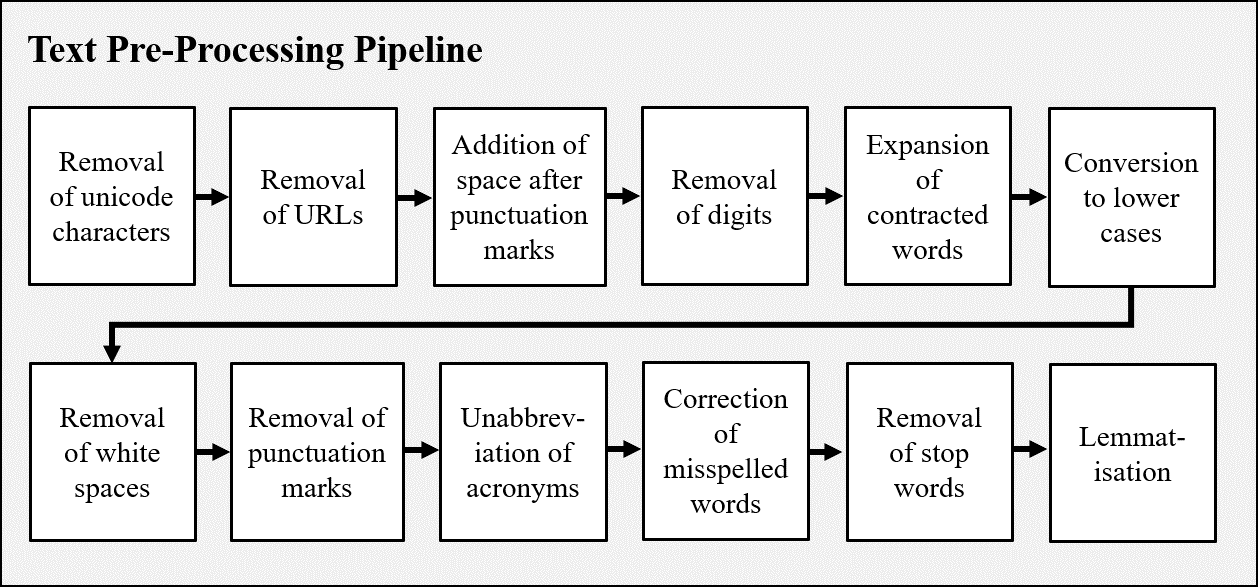
</div>

## Import the necessary libraries

In [206]:
import pandas as pd
import re
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from collections import Counter
%pprint

Pretty printing has been turned ON


In [207]:
nlp = spacy.load("en_core_web_sm")

## Define functions

In [243]:
def to_csv(df, path):
    
    """This function saves a Pandas dataframe at a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Prepend dtypes to the top of df
    df2 = df.copy()
    df2.loc[-1] = df2.dtypes
    df2.index = df2.index + 1
    df2.sort_index(inplace=True)
    
    # Then save it to a csv
    df2.to_csv(path, index=False)
    
    return True

In [208]:
def remove_stopwords(text_string):

    """This function takes a text string as input, tokenises it and returns a list of tokens without stopwords."""
    
    word_list = [word for word in nltk.word_tokenize(text_string) if not word in set(stopwords.words('english'))]
    text = ' '.join(word_list).replace(' .', '').replace(' ,', '').replace('< ', '<').replace(' >', '>')

    return text

In [209]:
def lemmatise(text_string):

    """This function takes a tokenised text string as input and returns another tokenised text string after lemmatisation."""

    list_of_tokens = [token.lemma_ for token in nlp(text_string)]
    text = ' '.join(list_of_tokens).replace('< ', '<').replace(' >', '>')
    
    return text

In [210]:
def unabbreviate(text):

    """This function takes a text string as input, finds acronyms as defined in a specified Python dictionary,
    and replaces those acronyms with their unabbreviated forms."""
    
    # Define a Python dictionary to match acronym to their non-abbreviated forms
    acronym_dict = {'ICA': 'immigration and checkpoints authority', 
                    'ID': 'identity',
                    'DBS': 'dbs bank', 
                    'FB': 'facebook',
                    'SG': 'singapore',
                    'UK': 'united kingdom',
                    'NRIC': 'identity number',
                    'IC': 'identity number',
                    'I/C': 'identity number',
                    'HQ': 'headquarters',
                    'MOM': 'ministry of manpower',
                    'POSB': 'posb bank',
                    'MOH': 'ministry of health',
                    'OCBC': 'ocbc bank',
                    'CMB': 'cmb bank',
                    'SPF': 'singapore police force',
                    'IRAS': 'inland revenue authority of singapore',
                    'UOB': 'uob bank',
                    'IG': 'instagram',
                    'HP': 'handphone',
                    'HK': 'hong kong',
                    'KL': 'kuala lumpur',
                    'PM': 'private message',
                    'MRT': 'mass rapid transit train',
                    'DOB': 'date of birth',
                    'ATM': 'automated teller machine',
                    'MAS': 'monetary authority of singapore',
                    'PRC': 'people republic of china',
                    'USS': 'universal studios singapore',
                    'MIA': 'missing in action',
                    'GST': 'goods and services tax',
                    'CIMB': 'cimb bank',
                    'HSBC': 'hsbc bank',
                    'MBS': 'marina_bay_sands',
                    'LTD': 'limited',
                    'ASAP': 'as soon as possible',
                    'IBAN': 'international bank account number',
                    'HR': 'human resource',
                    'AMK': 'ang mo kio',
                    'CID': 'criminal investigation department',
                    'PTE': 'private',
                    'OTP': 'one time password',
                    'WA': 'whatsapp',
                    'PC': 'personal computer',
                    'ACRA': 'accounting and corporate regulatory authority',
                    'CPF': 'central provident fund',
                    'ISD': 'internal security department', 
                    'WP': 'work permit',
                    'OKC': 'okcupid', 
                    'HDB': 'housing development board', 
                    'NPC': 'neighbourhood police centre',
                    'MOP': 'member of public',
                    'MOPS': 'members of public', 
                    'IMO': 'in my opinion',
                    'ISP': 'internet service provider', 
                    'IMDA': 'infocomm media development authority', 
                    'CB': 'circuit breaker',
                    'MINLAW': 'ministry of law',
                    'LMAO': 'laugh my ass off',
                    'AKA': 'also known as',
                    'BF': 'boyfriend', 
                    'W/O': 'without',
                    'MOF': 'ministry of finance'}
    
    # Tokenize the text
    x = nltk.word_tokenize(text)

    # Replace acronyms (both upper-case and lower-case) with their unabbreviated forms
    for index, token in enumerate(x):
        for k, v in acronym_dict.items():
            if token == k or token == k.lower():
                x[index] = v
                break

    return ' '.join(x).replace(" .", ".").replace(" ,", ",")

In [211]:
def remove_url(text): 

    """This function takes a text string as input and replaces URL links with a <url> token."""

    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))" 
    text = re.sub(regex, "url_link", text)   
    
    return text

In [212]:
def decontract(phrase):
    
    """This function takes a phrase, finds contracted words and expands them.
    Source: https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python"""
    
    # Specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"let\'s", "let us", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # Specific
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)
    phrase = re.sub(r"let\’s", "let us", phrase)

    # general
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)
    
    return phrase

In [213]:
def remove_punct(text):

    """This function takes a text string as input and returns the same text string without specified punctuation marks."""
    
    # Specify punctuation marks to remove from text string
    punctuation = "``-±!@#$%^&*()+?:;”“’<>" 

    # Loop through the text to remove specified punctuations
    for c in text:
        if c in punctuation:
            text = text.replace(c, "").replace('/', ' ').replace('`', "").replace('"', '')

    return text

In [214]:
def correct_misspelled_words(text):
    
    """This function takes a text string as input, finds misspelled words in a pre-defined Python dictionary,
    and replaces them with their correctly spelled forms."""
    
    # Define a Python dictionary to match misspelled words to their correctly-spelled forms
    spellcheck_dict = {'acct': 'account', 
                       'acc': 'account',
                       'a/c': 'account',
                       'blk': 'block',
                       'alot': 'a lot', 
                       'abit': 'a bit',
                       'watsapp': 'whatsapp',
                       'whatapps': 'whatsapp',
                       'whatapp': 'whatsapp',
                       'wadsapp': 'whatsapp',
                       'watapps': 'whatsapp',
                       'whatsapps': 'whatsapp',
                       'whats app': 'whatsapp',
                       'whatsaap': 'whatsapp',
                       'whatsap': 'whatsapp',
                       'whattsapp': 'whatsapp',
                       'whattapp': 'whatsapp',
                       'whatsap': 'whatsapp',
                       'whataspp': 'whatsapp',
                       'whatapps': 'whatsapp',
                       'whastapp': 'whatsapp',
                       'whatsapphe': 'whatsapp',
                       'whattapp': 'whatsapp',
                       'abt': 'about',
                       'recieved': 'received',
                       'recieve': 'receive',
                       'hv': 'have',
                       'amt': 'amount',
                       'mths': 'months',
                       'gf': 'girlfriend',
                       'msia': 'malaysia',
                       'tranfer': 'transfer',
                       'trans': 'transfer',
                       'trf': 'transfer',
                       'becareful': 'be careful',
                       'frm': 'from',
                       'msgs': 'messages',
                       'msg': 'message',
                       'plz': 'please',
                       'pls': 'please',
                       'harrass': 'harass',
                       'sintel': 'singtel',
                       'ard': 'around',
                       'wk': 'week', 
                       'fyi': 'for your information',
                       'govt': 'government',
                       'gov': 'government',
                       'thru': 'through',
                       'assent': 'accent', 
                       'dun': 'do not',
                       'nv': 'never', 
                       'sing-tel': 'singtel', 
                       'sintel': 'singtel',
                       'insta': 'instagram', 
                       'sg': 'singapore', 
                       'payapl': 'paypal', 
                       'carousel': 'carousell',
                       'tix': 'tickets', 
                       'mandrain': 'mandarin', 
                       'admin': 'administrative',
                       'bz': 'busy',
                       'daugter': 'daughter',
                       'cos': 'because',
                       'bcos': 'because',
                       'I-banking': 'internet banking',
                       'intl': 'international',
                       'shoppe': 'shopee',
                       'tis': 'this',
                       'docs': 'documents',
                       'doc': 'document',
                       'ytd': 'yesterday', 
                       'tmr': 'tomorrow', 
                       'mon': 'monday',
                       'tue': 'tuesday', 
                       'tues': 'tuesday', 
                       'wed': 'wednesday',
                       'thu': 'thursday',
                       'thur': 'thursday', 
                       'thurs': 'thursday',
                       'fri': 'friday',
                       'wikipeida': 'wikipedia',
                       'juz': 'just',
                       'impt': 'important',
                       'transger': 'transfer',
                       'suspicios': 'suspicious',
                       'suspicius': 'suspicious',
                       'suspicous': 'suspicious',
                       'suspecious': 'suspicious',
                       'suspision': 'suspicion',
                       'nvr': 'never', 
                       'instagam': 'instagram', 
                       'instagramm': 'instagram',
                       "s'pore": "singapore", 
                       'polive': 'police',
                       'linkein': 'linkedin',
                       'messanger': 'messenger', 
                       'scammmer': 'scammer',
                       'laywer': 'lawyer',
                       'dunno': 'do not know',
                       'tidner': 'tinder',
                       'rcvd': 'received',
                       'infomed': 'informed',
                       'informaing': 'informing', 
                       'knowldge': 'knowledge'}

    # Tokenize the text
    x = nltk.word_tokenize(text)    
    
    for index, token in enumerate(x):
        for k, v in spellcheck_dict.items():
            if token == k:
                x[index] = v
                break
        
    return ' '.join(x).replace(' .', '.').replace(' ,', ',').replace('< ', '<').replace(' >', '>')

In [215]:
def pre_process(text):

    """This function takes a text string as input and pre-processes them as follow: 
    1. Ignore ASCII encodings if any, and decode them as UTF-8
    2. Replaces any URL link with 'url_link' 
    3. Add space after comma, full-stop, question and exclamation mark
    4. Remove digits
    5. Expands out contracted words
    6. Convert all words into lower cases and remove white spaces
    7. Remove punctuations except full-stops and commas
    8. Replace acronyms with unabbreviated forms 
    9. Replace misspelled words with correctly-spelled forms"""
    
    # 1. Ignore ASCII encodings if any, and decode them as UTF-8
    text = text.encode('ascii', 'ignore').decode('utf-8')
    
    # 2. Replace any URL link with 'url_link' 
    text = remove_url(text.replace('\n', ' '))

    # 3. Add a space after comma, full-stop, question mark and exclamation mark
    text = re.sub(r'(?<=[.,?!])(?=[^\s])', r' ', text)
    
    # 4. Remove digits
    text = re.sub(r'\d+', '', text)
    
    # 5. Expand contractions
    text = decontract(text)

    # 6. Convert to lower cases and remove white spaces
    text = text.lower().strip().replace('’s', '')

    # 7. Remove punctuations except full-stops and commas.
    text = remove_punct(text)

    # 8. Replace acronyms with their unabbreviated forms
    text = unabbreviate(text)

    # 9. Replace misspelled words with their correctly-spelled forms
    text = correct_misspelled_words(text)

    return text

In [216]:
def read_csv(path):
    
    """This function reads a CSV file from a specified filepath, while preserving the data types of each variable.
    Source: https://stackoverflow.com/questions/50047237/how-to-preserve-dtypes-of-dataframes-when-using-to-csv/50051542#50051542"""
    
    # Read types first line of csv
    dtypes = {key:value for (key,value) in pd.read_csv(path, nrows=1).iloc[0].to_dict().items() if 'date' not in value}

    parse_dates = [key for (key,value) in pd.read_csv(path, 
                   nrows=1).iloc[0].to_dict().items() if 'date' in value]
    # Read the rest of the lines with the types from above
    return pd.read_csv(path, dtype=dtypes, parse_dates=parse_dates, skiprows=[1])

## Load the dataset

In [217]:
# Load dataset, with submission ID as the index
text_scam_df = read_csv("Data/scam_data_3.csv").set_index('submission_id')

# First five rows
text_scam_df.head()

,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,scammer_name,scammer_contact,scam_type
submission_id,,,,,,,,,,,,
20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,I only know the number,923329855137,Impersonation Scam
20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,Ministry of law,6566309459,Phishing Scam
20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,SIngtel,NaN,Phishing Scam
20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,Singapore high or supreme court,NaN,Impersonation Scam
20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,Phishing Scam


In [218]:
# # Load dataset, with submission ID as the index
# text_scam_df = pd.read_csv("Data/scam_data_2.csv").set_index('submission_id').drop(columns=['Unnamed: 0'])

# # First five rows
# text_scam_df.head()

## Dealing with Acronyms

The following code finds acronyms in the text corpus and ranks them in descending order. Then, a Python dictionary is created, mapping the most commonly-occurring acronyms in the corpus to their non-abbreviated forms.

In [219]:
# Find consecutive upper-case letters representing acronyms. Save them in a list.

# acronyms = []
# for i in text_scam_df['incident_description']:
#     acronyms += re.findall(r"\b[A-Z]{2,}\b", i)

In [220]:
# Count the most commonly-occuring acronyms

# Counter(acronyms).most_common(100)

In [221]:
# # Define a Python dictionary to match acronym to their non-abbreviated forms
# acronym_dict = {'ICA': 'immigration_and_checkpoints_authority', 
#                 'ID': 'identity',
#                 'DBS': 'dbs_bank', 
#                 'FB': 'facebook',
#                 'SG': 'singapore',
#                 'UK': 'united_kingdom',
#                 'NRIC': 'identity_number',
#                 'HQ': 'headquarters',
#                 'MOM': 'ministry_of_manpower',
#                 'POSB': 'posb_bank',
#                 'MOH': 'ministry_of_health',
#                 'OCBC': 'ocbc_bank',
#                 'CMB': 'cmb_bank',
#                 'SPF': 'singapore_police_force',
#                 'IRAS': 'inland_revenue_authority_of_singapore',
#                 'UOB': 'uob_bank',
#                 'IG': 'instagram',
#                 'HP': 'handphone',
#                 'HK': 'hong_kong',
#                 'KL': 'kuala_lumpur',
#                 'PM': 'private_message',
#                 'MRT': 'mass_rapid_transit_train',
#                 'DOB': 'date_of_birth',
#                 'ATM': 'automated_teller_machine',
#                 'MAS': 'monetary_authority_of_singapore',
#                 'PRC': 'people_republic_of_china',
#                 'USS': 'universal_studios_singapore',
#                 'MIA': 'missing_in_action',
#                 'GST': 'goods_and_services_tax',
#                 'CIMB': 'cimb_bank',
#                 'HSBC': 'hsbc_bank',
#                 'MBS': 'marina_bay_sands',
#                 'LTD': 'limited',
#                 'CASE': 'consumer_association_of_singapore',
#                 'ASAP': 'as_soon_as_possible',
#                 'IBAN': 'international_bank_account_number',
#                 'HR': 'human_resource',
#                 'AMK': 'ang_mo_kio',
#                 'CID': 'criminal_investigation_department',
#                 'PTE': 'private',
#                 'OTP': 'one_time_password',
#                 'WA': 'whatsapp',
#                 'ACRA': 'accounting_and_corporate_regulatory_authority',
#                 'CPF': 'central_provident_fund',
#                 'ISD': 'internal_security_department', 
#                 'WP': 'work_permit',
#                 'OKC': 'okcupid'}

## Dealing with Misspelled Words

The following code finds misspelled words in the text corpus and ranks them in descending order. Then, a Python dictionary is created, mapping the most common misspelled words in the corpus to their correctly-spelled forms.

In [222]:
# # Create an instance of SpellChecker()
# spell = SpellChecker()

In [223]:
# # Initialise an empty list to store all unknown words
# misspelled = []

# # Iterate through the corpus and append unknown words to the empty list
# for i in text_scam_df['incident_description']:
#     misspelled += list(spell.unknown(pre_process(i)))

In [224]:
# len(misspelled)

In [225]:
# Counter(misspelled).most_common(100)

In [226]:
# # Then, using the most common misspelled words, define a Python dictionary to match them to their correctly-spelled forms.
# spellcheck_dict = {'acct': 'account', 
#                    'blk': 'block',
#                    'alot': 'a lot', 
#                    'abit': 'a bit',
#                    'watsapp': 'whatsapp',
#                    'whatapps': 'whatsapp',
#                    'whatapp': 'whatsapp',
#                    'abt': 'about',
#                    'recieved': 'received',
#                    'recieve': 'receive',
#                    'hv': 'have',
#                    'amt': 'amount',
#                    'mths': 'months',
#                    'gf': 'girlfriend',
#                    'msia': 'malaysia',
#                    'tranfer': 'transfer',
#                    'becareful': 'be careful',
#                    'frm': 'from',
#                    'msgs': 'messages',
#                    'plz': 'please',
#                    'pls': 'please',
#                    'harrass': 'harass',
#                    'sintel': 'singtel',
#                    'ard': 'around',
#                    'wk': 'week', 
#                    'fyi': 'for your information',
#                    'acct': 'account', 
#                    'govt': 'government'}

## Step-by-step text pre-processing on an example from the dataset

In [227]:
# Select an random text from dataset
text = text_scam_df['incident_description'][1]
text

'\r\n                it happened this morning 0913hrs\ni received a phone call from the above number\n\nRobcall claimed that the call was made from the\xa0ministry of law, and cannot reach me multiple times. It later asked me to press 3 for further info.\n\nKnowing that it was a scam, i hung up the call.\xa0\r\n            '

In [228]:
# 1. Ignore ASCII encodings if any, and decode them as UTF-8
text = re.sub(r'[^\x00-\x7f]',r' ', text) 
# text = text.encode('ascii', 'ignore').decode('utf-8') # Alternative method, which does not leave space
text

'\r\n                it happened this morning 0913hrs\ni received a phone call from the above number\n\nRobcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. It later asked me to press 3 for further info.\n\nKnowing that it was a scam, i hung up the call. \r\n            '

In [229]:
# 2. Replace any URL link with 'url_link' 
text = remove_url(text.replace('\n', ' '))
text

'\r                 it happened this morning 0913hrs i received a phone call from the above number  Robcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. It later asked me to press 3 for further info.  Knowing that it was a scam, i hung up the call. \r             '

In [230]:
# 3. Add a space after comma, full-stop, question mark and exclamation mark
text = re.sub(r'(?<=[.,?!])(?=[^\s])', r' ', text)
text

'\r                 it happened this morning 0913hrs i received a phone call from the above number  Robcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. It later asked me to press 3 for further info.  Knowing that it was a scam, i hung up the call. \r             '

In [231]:
# 4. Remove digits 
text = re.sub(r'\d+', '', text)
text

'\r                 it happened this morning hrs i received a phone call from the above number  Robcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. It later asked me to press  for further info.  Knowing that it was a scam, i hung up the call. \r             '

In [232]:
# 5. Expand contractions
text = decontract(text)
text

'\r                 it happened this morning hrs i received a phone call from the above number  Robcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. It later asked me to press  for further info.  Knowing that it was a scam, i hung up the call. \r             '

In [233]:
# 6. Convert to lower cases and remove white spaces
text = text.lower().strip().replace('’s', '')
text

'it happened this morning hrs i received a phone call from the above number  robcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. it later asked me to press  for further info.  knowing that it was a scam, i hung up the call.'

In [234]:
# 7. Remove punctuations except full-stops and commas.
text = remove_punct(text)
text

'it happened this morning hrs i received a phone call from the above number  robcall claimed that the call was made from the ministry of law, and cannot reach me multiple times. it later asked me to press  for further info.  knowing that it was a scam, i hung up the call.'

In [235]:
# 8. Replace acronyms with their unabbreviated forms
text = unabbreviate(text)
text

'it happened this morning hrs i received a phone call from the above number robcall claimed that the call was made from the ministry of law, and can not reach me multiple times. it later asked me to press for further info. knowing that it was a scam, i hung up the call.'

In [236]:
# 9. Replace misspelled words with their correctly-spelled forms
text = correct_misspelled_words(text)
text

'it happened this morning hrs i received a phone call from the above number robcall claimed that the call was made from the ministry of law, and can not reach me multiple times. it later asked me to press for further info. knowing that it was a scam, i hung up the call.'

## Pre-process the entire dataset

In [237]:
text_scam_df.head()

,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,scammer_name,scammer_contact,scam_type
submission_id,,,,,,,,,,,,
20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,I only know the number,923329855137,Impersonation Scam
20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,Ministry of law,6566309459,Phishing Scam
20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,SIngtel,NaN,Phishing Scam
20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,Singapore high or supreme court,NaN,Impersonation Scam
20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,Phishing Scam


In [238]:
# Initialise a new column
text_scam_df = text_scam_df.assign(preprocessed_text="")

# Pre-process text of each story and assign the result to the column 'preprocessed_text'
for index, text in text_scam_df.iterrows():
    
    # Pre-process each story and assign it to the new column
    text_scam_df.loc[index, 'preprocessed_text'] = pre_process(text['incident_description'])

# Rearrange columns
text_scam_df = text_scam_df[['date', 'year', 'month', 'date_num', 'day', 'week_num', 'monthyear', 'informant', 'incident_description', 'preprocessed_text', 'scammer_name', 'scammer_contact', 'scam_type']]

# Reset index
text_scam_df = text_scam_df.reset_index()

# Sanity check
text_scam_df.head(10)

,submission_id,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,preprocessed_text,scammer_name,scammer_contact,scam_type
0,20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...,I only know the number,923329855137,Impersonation Scam
1,20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...,Ministry of law,6566309459,Phishing Scam
2,20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...,SIngtel,NaN,Phishing Scam
3,20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,details i received a call from what seemed lik...,Singapore high or supreme court,NaN,Impersonation Scam
4,20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,Phishing Scam
5,20200715-O0xzp3,2020-07-15,2020,July,15,Wednesday,29,2020-07-01,Anonymous,\r\n Hi I received a whats app ...,hi i received a whats app from someone called ...,Zu Lan,NaN,Home/Room Rental Scam
6,20200715-uqohM3,2020-07-15,2020,July,15,Wednesday,29,2020-07-01,Anonymous,\r\n This man is from China and...,this man is from china and claimed live in hon...,Lin tian ze,NaN,Internet Love Scam
7,20200715-t94sPY,2020-07-15,2020,July,15,Wednesday,29,2020-07-01,Anonymous,\r\n Met online at inner circle...,met online at inner circle dating app. said hi...,Raymond chaoxiang,NaN,Internet Love Scam
8,20200715-kX0SDp,2020-07-15,2020,July,15,Wednesday,29,2020-07-01,Anonymous,\nI received a call from “John” from Singtel i...,i received a call from john from singtel inter...,JOHN FROM SINGTEL,+61391675547,Phishing Scam
9,20200715-mMoScW,2020-07-15,2020,July,15,Wednesday,29,2020-07-01,Nurulfaatihah muhammad hosain,\nReceived a call from +6580609718 but hung up...,received a call from but hung up as call was u...,high court,81770347,Phishing Scam


## Remove stopwords and lemmatise

In [239]:
text_scam_df = text_scam_df.assign(stopwords_removed="")
text_scam_df = text_scam_df.assign(lemmatised="")

for index, text in text_scam_df.iterrows():

    stopwords_removed = remove_stopwords(text['preprocessed_text'])
    text_scam_df.loc[index, 'stopwords_removed'] = stopwords_removed

    lemmatised = lemmatise(stopwords_removed)
    text_scam_df.loc[index, 'lemmatised'] = lemmatised
    
# Sanity check
text_scam_df.head()

,submission_id,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,preprocessed_text,scammer_name,scammer_contact,scam_type,stopwords_removed,lemmatised
0,20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...,I only know the number,923329855137,Impersonation Scam,call whatsapp strange number dbs bank logo con...,call whatsapp strange number dbs bank logo con...
1,20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...,Ministry of law,6566309459,Phishing Scam,happened morning hrs received phone call numbe...,happen morning hrs receive phone call number r...
2,20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...,SIngtel,NaN,Phishing Scam,rceived call lady claiming calling singtel sta...,rceiv call lady claim call singtel start call ...
3,20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,details i received a call from what seemed lik...,Singapore high or supreme court,NaN,Impersonation Scam,details received call seemed like singapore mo...,detail receive call seem like singapore mobile...
4,20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,Phishing Scam,impersonated junior technical staff called hom...,impersonate junior technical staff call home s...


In [240]:
# Compute lengths of `preprocessed_text` and `lemmatised` text
text_scam_df['len_preprocessed_text'] = text_scam_df.apply(lambda x: len(x['preprocessed_text'].split()), axis=1)
text_scam_df['len_lemmatised'] = text_scam_df.apply(lambda x: len(x['lemmatised'].split()), axis=1)
text_scam_df.head()

,submission_id,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,preprocessed_text,scammer_name,scammer_contact,scam_type,stopwords_removed,lemmatised,len_preprocessed_text,len_lemmatised
0,20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...,I only know the number,923329855137,Impersonation Scam,call whatsapp strange number dbs bank logo con...,call whatsapp strange number dbs bank logo con...,85,36
1,20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...,Ministry of law,6566309459,Phishing Scam,happened morning hrs received phone call numbe...,happen morning hrs receive phone call number r...,52,24
2,20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...,SIngtel,NaN,Phishing Scam,rceived call lady claiming calling singtel sta...,rceiv call lady claim call singtel start call ...,249,117
3,20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,details i received a call from what seemed lik...,Singapore high or supreme court,NaN,Impersonation Scam,details received call seemed like singapore mo...,detail receive call seem like singapore mobile...,246,127
4,20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,Phishing Scam,impersonated junior technical staff called hom...,impersonate junior technical staff call home s...,180,98


In [241]:
# Rearrange columns
text_scam_df = text_scam_df[['submission_id', 'date', 'year', 'month', 'date_num', 'day', 'week_num', 'monthyear', 
                        'informant', 'incident_description', 'preprocessed_text', 'scammer_name', 
                        'scammer_contact', 'stopwords_removed', 'lemmatised', 'len_preprocessed_text', 
                        'len_lemmatised', 'scam_type']] 

# Sanity checks
text_scam_df.head()

,submission_id,date,year,month,date_num,day,week_num,monthyear,informant,incident_description,preprocessed_text,scammer_name,scammer_contact,stopwords_removed,lemmatised,len_preprocessed_text,len_lemmatised,scam_type
0,20200717-fBLC6F,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n They call me by whatsapp ...,they call me by whatsapp it was strange for th...,I only know the number,923329855137,call whatsapp strange number dbs bank logo con...,call whatsapp strange number dbs bank logo con...,85,36,Impersonation Scam
1,20200717-yOxIAl,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n it happened this morning 0...,it happened this morning hrs i received a phon...,Ministry of law,6566309459,happened morning hrs received phone call numbe...,happen morning hrs receive phone call number r...,52,24,Phishing Scam
2,20200717-Tz5TyW,2020-07-17,2020,July,17,Friday,29,2020-07-01,Anonymous,\r\n I rceived a call from a la...,i rceived a call from a lady claiming to be ca...,SIngtel,NaN,rceived call lady claiming calling singtel sta...,rceiv call lady claim call singtel start call ...,249,117,Phishing Scam
3,20200716-O79B6r,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\r\n details: I received a call...,details i received a call from what seemed lik...,Singapore high or supreme court,NaN,details received call seemed like singapore mo...,detail receive call seem like singapore mobile...,246,127,Impersonation Scam
4,20200716-yIa3LH,2020-07-16,2020,July,16,Thursday,29,2020-07-01,Anonymous,\n1) An impersonated junior technical staff ca...,an impersonated junior technical staff called ...,"SINGTEL, RON WATSON from CYBER secury defence ...",40142219,impersonated junior technical staff called hom...,impersonate junior technical staff call home s...,180,98,Phishing Scam


## Save as a CSV file

In [245]:
# Save as .CSV file
to_csv(text_scam_df, "Data/scam_data_4.csv") 

True